## Logistic Regression

Logistic Regression is a classification algorithm and not a regression algorithm. It is used to estimate discrete values (like 0 or 1, True or False, Yes or No) based on a given set of independent variables.

Logistic Regression produces results in a binary format that is used to predict the outcome of a categorical dependent variable. So the outcome should be discrete/categorical.

## Confusion Matrix

It is a 2x2 matrix that has 4 outcomes. This tells how accurate the values are.

## Dataset

We will be using a simple dataset to implement this algorithm. This dataset contains Head Size (cm^3) and Brain Weight (grams) columns where Head Size is an independent variable.

Download the dataset [here]().

## So let’s begin here…

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
data = pd.read_csv("suv.csv")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
print("Number of customers: ", len(data))

Number of customers:  400


## Analyzing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


## Customers who purchased the SUV

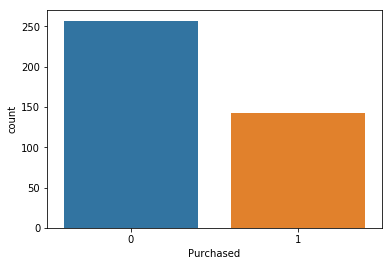

In [5]:
sns.countplot(x='Purchased', data = data)

## Customers who purchased the SUV based on Gender

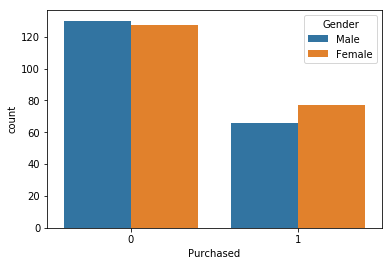

In [6]:
sns.countplot(x='Purchased', hue = 'Gender', data = data)

## Graph for age of customers

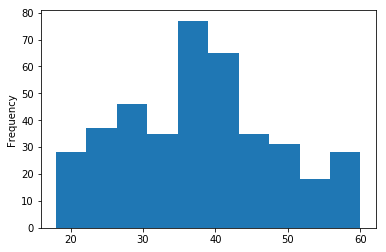

In [7]:
data['Age'].plot.hist()

## Graph for Estimated Salary of Customers

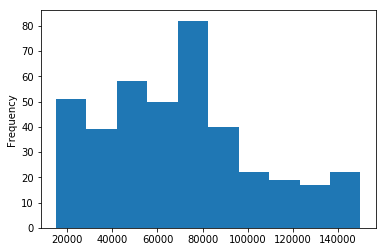

In [8]:
data['EstimatedSalary'].plot.hist()

## Customers who purchased the SUV based on Age

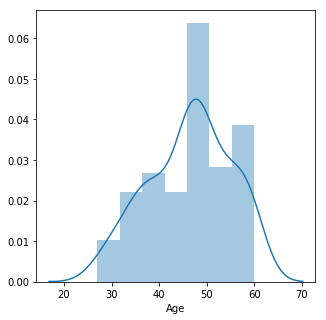

In [9]:
plt.figure(figsize = (5,5))
sns.distplot(data[data['Purchased']==1]['Age'])

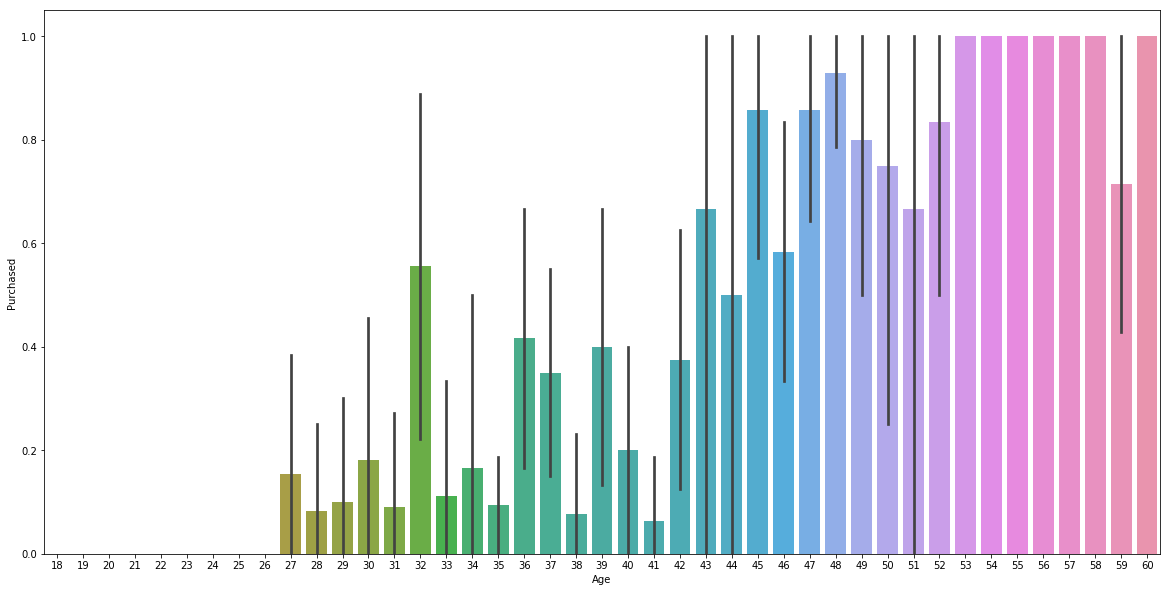

In [10]:
plt.figure(figsize = (20,10))
sns.barplot(x=data['Age'],y=data['Purchased'])

## Customers who purchased the SUV based on Estimated Salary

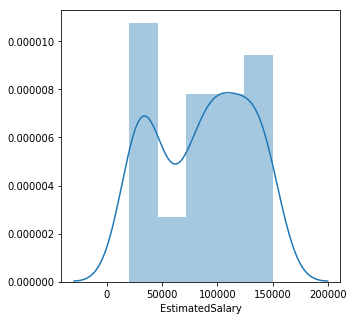

In [11]:
plt.figure(figsize = (5,5))
sns.distplot(data[data['Purchased']==1]['EstimatedSalary'])

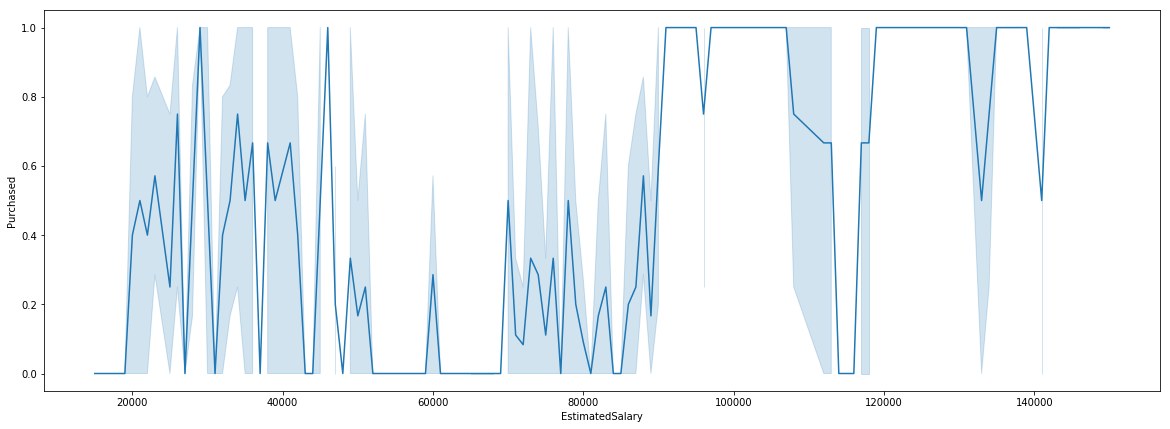

In [12]:
plt.figure(figsize = (20,7))
sns.lineplot(x=data['EstimatedSalary'],y=data['Purchased'])

## Preprocessing

In [13]:
Gender = pd.get_dummies(data['Gender'], drop_first = True)
Gender.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [14]:
data = pd.concat([data, Gender], axis = 1)

### Dropping User ID and Gender column

In [15]:
data.drop(['User ID', 'Gender'], axis = 1, inplace = True)
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


## Dependent and Independent variables

In [16]:
X = data.drop('Purchased', axis = 1)
y = data['Purchased']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Train and Test data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\rishabh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Define Model

In [21]:
model = LogisticRegression(solver = 'liblinear')

## Fit Model

In [22]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions

In [23]:
predictions = model.predict(X_test)

## Classification Report

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

   micro avg       0.82      0.82      0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



## Confusion Matrix

In [28]:
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))

Confusion Matrix: 
 [[40  8]
 [ 6 26]]


## Accuracy

In [29]:
print("Accuracy: ",accuracy_score(y_test, predictions))

Accuracy:  0.825
